In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../input/drw-crypto-market-prediction/train.parquet'

try:
    train_df = pd.read_parquet(file_path, engine = 'pyarrow')
    #train_df = train_df.head(10000)


    print("successful training data loaded")

    display(train_df.head())

except FileNotFoundError:
    print('erro could not find data/train.parquet')
    

successful training data loaded


,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.181844,-0.637860,0.006652,0.136870,0.116698,...,0.333753,-0.009992,-0.695595,-0.444077,-0.191238,-0.184251,-0.471897,-0.625428,-0.553991,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.489497,-0.075619,0.431594,0.522400,0.475255,...,0.333657,-0.010040,-0.696226,-0.452866,-0.200082,-0.188929,-0.472842,-0.625832,-0.554426,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.260121,-0.444684,0.100695,0.224729,0.203282,...,0.333667,-0.010037,-0.696832,-0.461383,-0.208786,-0.193571,-0.473785,-0.626236,-0.554860,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.099976,-0.666728,-0.123858,0.019197,0.014459,...,0.333174,-0.010279,-0.697391,-0.469628,-0.217350,-0.198175,-0.474726,-0.626639,-0.555294,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.270893,-0.325973,0.116336,0.234311,0.214073,...,0.333171,-0.010283,-0.697940,-0.477622,-0.225780,-0.202745,-0.475666,-0.627043,-0.555728,0.362452


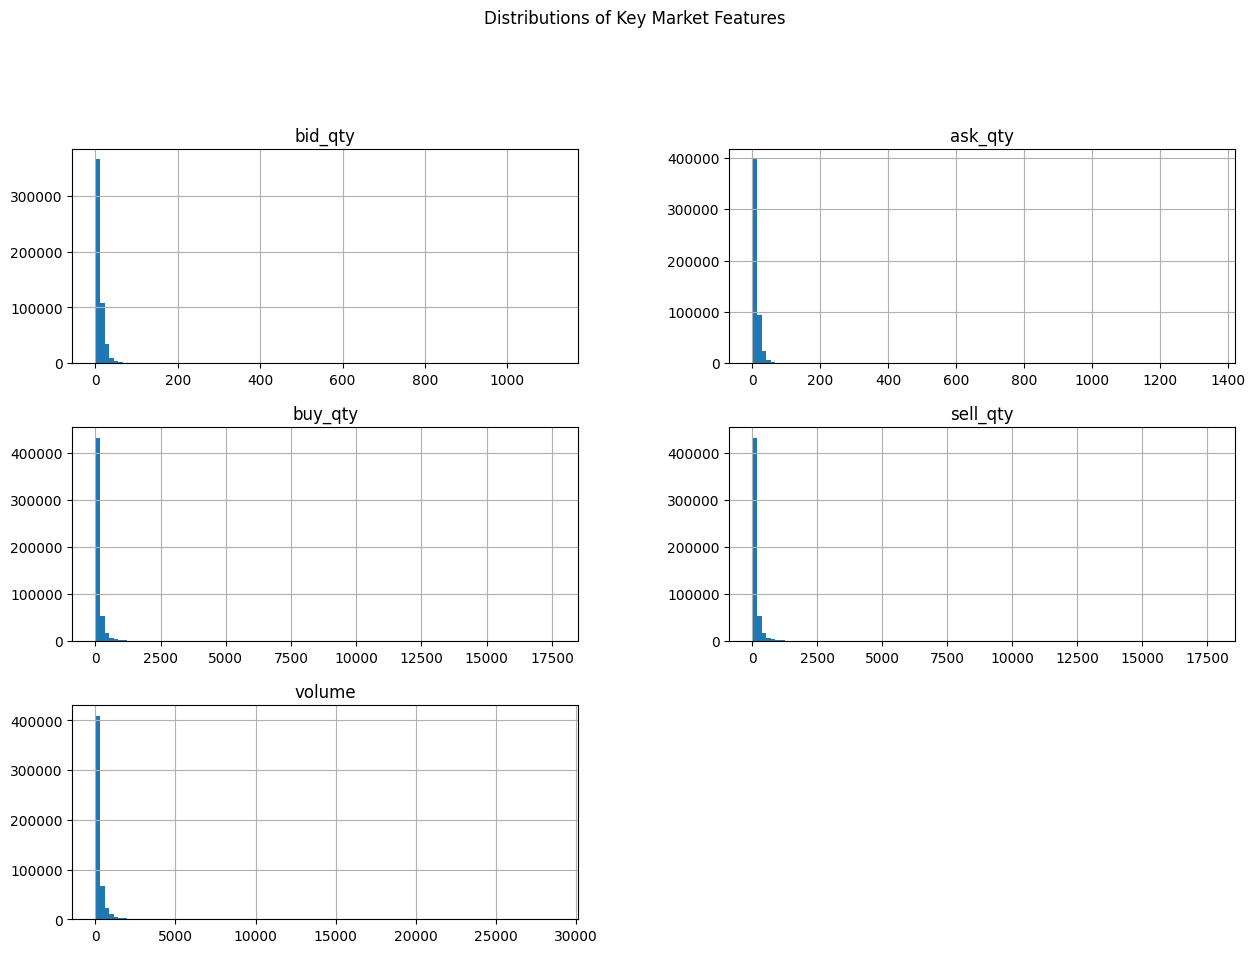

In [4]:
# Select the key numerical features we just analyzed
features_to_plot = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']

# Create histograms for each of these features
train_df[features_to_plot].hist(bins=100, figsize=(15, 10))

# Add a title for the whole plot
plt.suptitle('Distributions of Key Market Features', y=1.02)
plt.show()

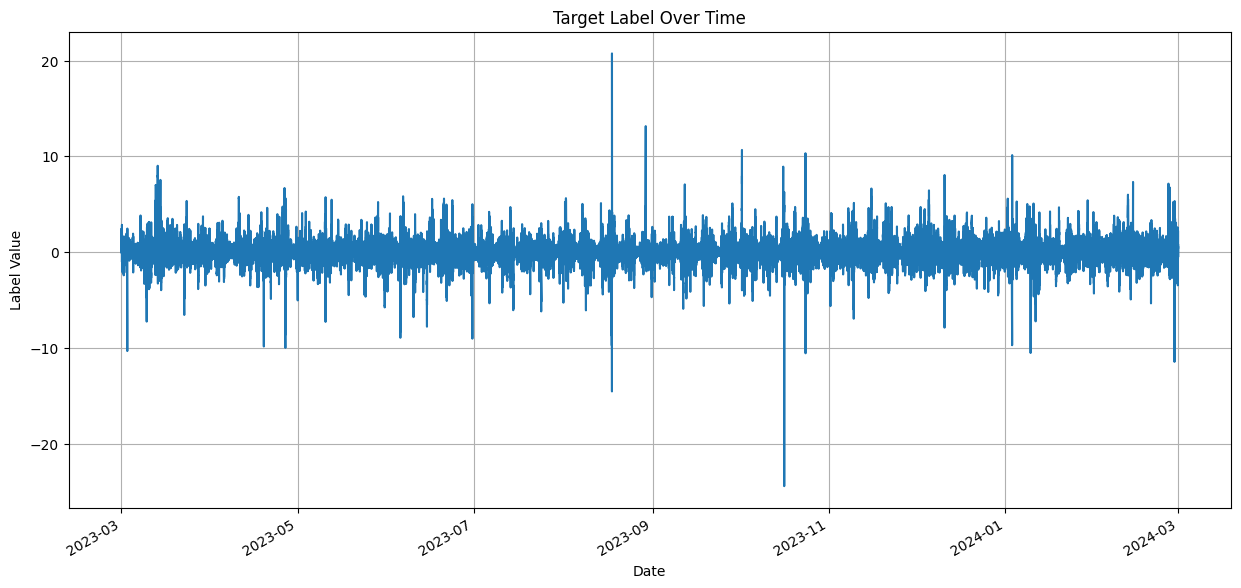

In [5]:
# Create a plot of the 'label' column over time
train_df['label'].plot(figsize=(15, 7),
                       title='Target Label Over Time',
                       xlabel='Date',
                       ylabel='Label Value')

# Show the plot
plt.grid(True)
plt.show()


--- Analyzing Average Behavior by Hour of the Day ---


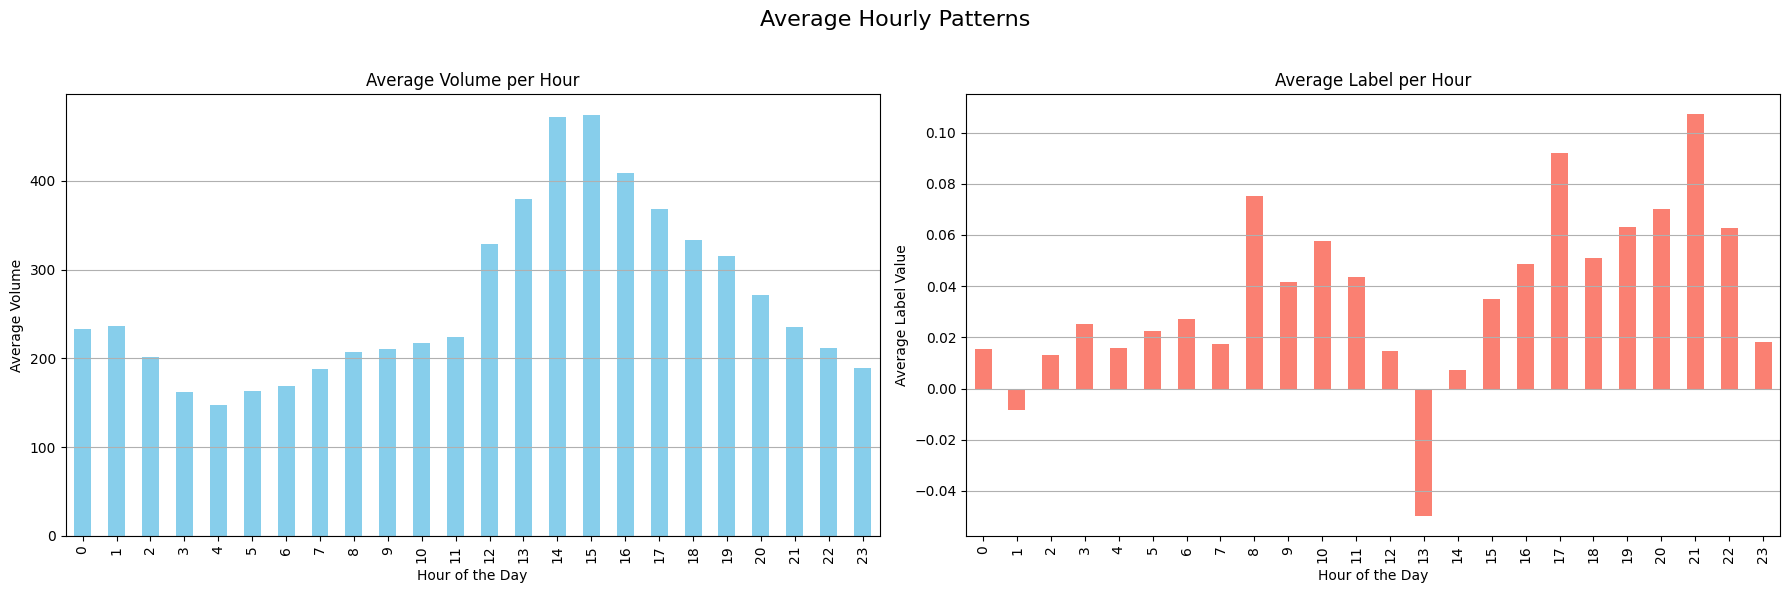

In [6]:
# --- Create time-based features ---
# Make sure the index is a datetime object
train_df.index = pd.to_datetime(train_df.index)

# Extract the hour of the day (0-23) from the timestamp
train_df['hour'] = train_df.index.hour


# --- Analyze by Hour ---
print("--- Analyzing Average Behavior by Hour of the Day ---")

# Group the data by the 'hour' and calculate the mean for key columns
hourly_analysis = train_df[['hour', 'volume', 'label']].groupby('hour').mean()

# --- Plot the results ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plt.suptitle('Average Hourly Patterns', fontsize=16)

# Plot average volume by hour
hourly_analysis['volume'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Volume per Hour')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Volume')
axes[0].grid(axis='y')

# Plot average label by hour
hourly_analysis['label'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Average Label per Hour')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Label Value')
axes[1].grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
# Ensure the index is a datetime object to access .hour and .dayofweek
train_df.index = pd.to_datetime(train_df.index)

# Create the 'hour' and 'dayofweek' columns
train_df['hour'] = train_df.index.hour
train_df['dayofweek'] = train_df.index.dayofweek

print("✅ 'hour' and 'dayofweek' columns have been re-created.")
import lightgbm as lgb

print("✅ LightGBM library has been imported.")
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import pearsonr

✅ 'hour' and 'dayofweek' columns have been re-created.
✅ LightGBM library has been imported.


In [11]:


print("✅ TimeSeriesSplit has been imported.")
# --- Our set of parameters to test ---
# Each tuple is (learning_rate, n_estimators)
params_to_test = [
    (0.1, 500),      # Faster learning, fewer trees
    (0.05, 1000),    # Balanced approach
    (0.02, 2500)     # Slower learning, more trees
]
results = {}

# --- Use our best feature set ---
features_smart = [
    'hour', 'dayofweek', 'X179', 'X137', 'X95', 'X712', 'X89', 'X131',
    'X83', 'X752', 'X656', 'X759', 'X22', 'X652', 'X648', 'X754',
    'X29', 'X21', 'X27', 'X28'
]
X_smart = train_df[features_smart]
y = train_df['label']


# --- Loop through each setting and run a full validation ---
for lr, n_est in params_to_test:
    
    print(f"\n--- Testing with learning_rate={lr}, n_estimators={n_est} ---")
    
    tscv = TimeSeriesSplit(n_splits=5)
    scores_corr = []

    for i, (train_index, test_index) in enumerate(tscv.split(X_smart)):
        X_train, X_test = X_smart.iloc[train_index], X_smart.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Use the specific hyperparameters for this run
        model = lgb.LGBMRegressor(
            random_state=42,
            learning_rate=lr,
            n_estimators=n_est,
            num_leaves=21 # Using the best value from our last experiment
        )
        
        model.fit(X_train, y_train, categorical_feature=['hour', 'dayofweek'])
        predictions = model.predict(X_test)
        score = pearsonr(y_test, predictions)[0]
        scores_corr.append(score)
    
    # Store the average score for this setting
    results[f"lr={lr}, n_est={n_est}"] = np.mean(scores_corr)

# --- Print the final summary ---
print("\n\n--- Hyperparameter Tuning Results ---")
for params, avg_score in results.items():
    print(f"Average Correlation for {params}: {avg_score}")

✅ TimeSeriesSplit has been imported.

--- Testing with learning_rate=0.1, n_estimators=500 ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4623
[LightGBM] [Info] Number of data points in the train set: 87651, number of used features: 20
[LightGBM] [Info] Start training from score 0.029390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4623
[LightGBM] [Info] Number of data points in the train set: 175298, number of used features: 20
[LightGBM] [Info] Start training from score 0.020701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0121

In [12]:
# --- 1. Define Your Best Model Configuration ---
print("Defining final model configuration...")

# This is our best feature set based on the feature importance plot
best_features = [
    'hour', 'dayofweek', 'X179', 'X137', 'X95', 'X712', 'X89', 'X131',
    'X83', 'X752', 'X656', 'X759', 'X22', 'X652', 'X648', 'X754',
    'X29', 'X21', 'X27', 'X28'
]
categorical_features = ['hour', 'dayofweek']

# Prepare the full training data with these features
X_full_train = train_df[best_features]
y_full_train = train_df['label']

# Initialize the model with our best hyperparameters
final_model = lgb.LGBMRegressor(
    learning_rate=0.1,
    n_estimators=500,
    num_leaves=21, # The best value from our other test
    random_state=42
)


# --- 2. Train the Model on 100% of the Data ---
print("Training final model on the entire dataset...")
final_model.fit(X_full_train, y_full_train, categorical_feature=categorical_features)
print("Final model trained successfully.")


# --- 3. Load and Prepare the Test Data ---
print("Loading and preparing test data...")
test_df = pd.read_parquet('../input/drw-crypto-market-prediction/test.parquet')

# IMPORTANT: You must create the exact same features for the test set
test_df.index = pd.to_datetime(test_df.index)
test_df['hour'] = test_df.index.hour
test_df['dayofweek'] = test_df.index.dayofweek

# Select the same feature columns
X_test = test_df[best_features]
print("Test data is ready.")


# --- 4. Make Predictions on the Test Data ---
print("Making final predictions...")
final_predictions = final_model.predict(X_test)


# --- 5. Create the Submission File ---
print("Creating submission file...")
submission_df = pd.read_csv('../input/drw-crypto-market-prediction/sample_submission.csv')
submission_df['prediction'] = final_predictions
submission_df.to_csv('submission.csv', index=False)

print("\n✅ 'submission.csv' has been created!")
display(submission_df.head())

Defining final model configuration...
Training final model on the entire dataset...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4623
[LightGBM] [Info] Number of data points in the train set: 525886, number of used features: 20
[LightGBM] [Info] Start training from score 0.036126
Final model trained successfully.
Loading and preparing test data...
Test data is ready.
Making final predictions...
Creating submission file...

✅ 'submission.csv' has been created!


,ID,prediction
0,1,0.002383
1,2,-0.441457
2,3,0.164166
3,4,0.038909
4,5,-0.923126
